[Dataset](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

- This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).<br>
Notes:
    - (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
    - The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learning:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
df = pd.read_csv('datasets/household_energy_consumption/household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

- data include 'nan' and '?' as a string. 
- converted both to numpy nan in importing stage 
- merged two columns 'Date' and 'Time' to 'dt'. 
- converted in the above, the data to time-series type, by taking index to be the time. 

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Attribute Information:

1.date: Date in format dd/mm/yyyy <br>
2.time: time in format hh:mm:ss <br>
3.global_active_power: household global minute-averaged active power (in kilowatt)<br>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)<br>
5.voltage: minute-averaged voltage (in volt)<br>
6.global_intensity: household global minute-averaged current intensity (in ampere)<br>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).<br>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## find all columns that have nan:

In [6]:
droping_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
print(droping_list_all)

[0, 1, 2, 3, 4, 5, 6]


## filling nan with mean in any columns

In [7]:
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

## another sanity check to make sure that there are no missing values

In [8]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

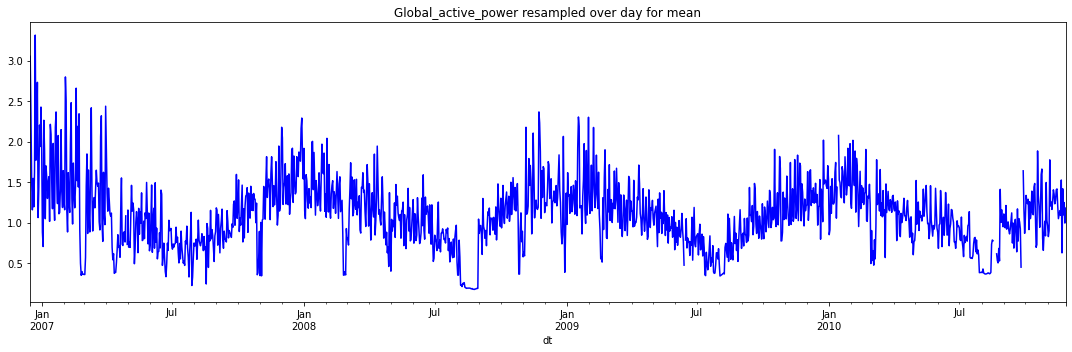

In [11]:
df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', 
                                                color='blue', figsize= (15,5)) 
plt.tight_layout()
plt.show()

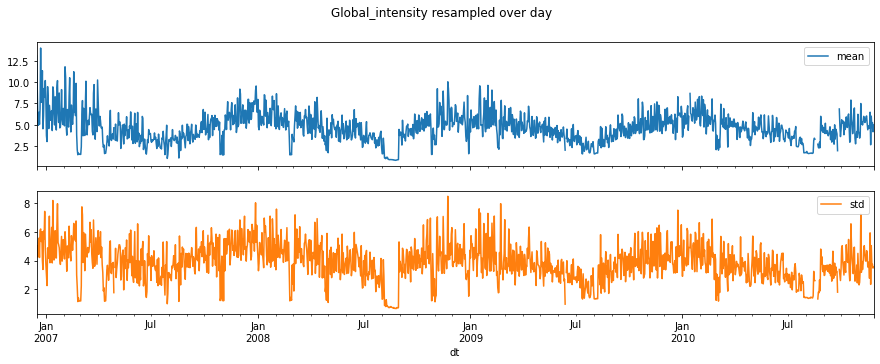

In [13]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day', figsize= (15,5))
plt.show()

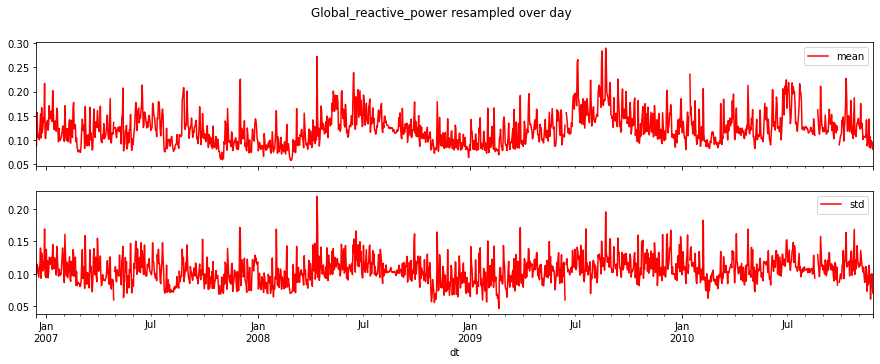

In [14]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red', figsize= (15,5))
plt.show()

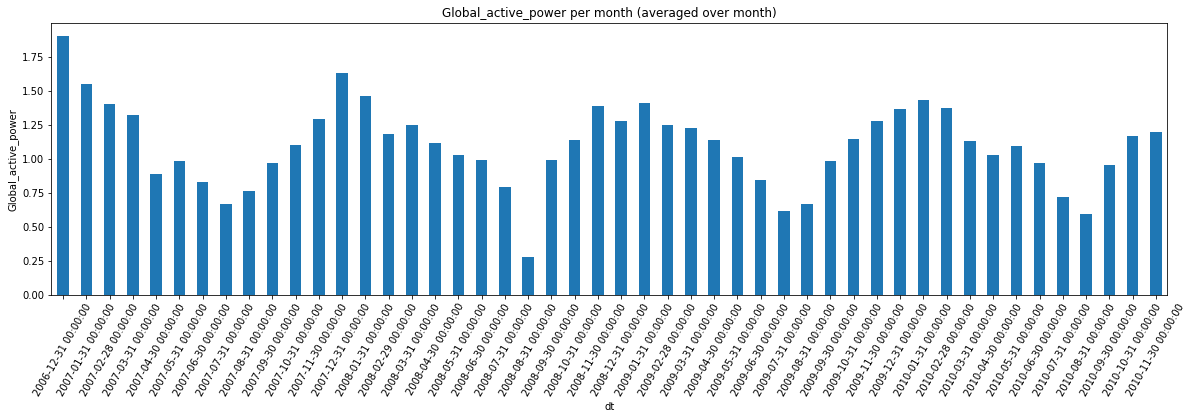

In [18]:
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar',figsize= (20,5))
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

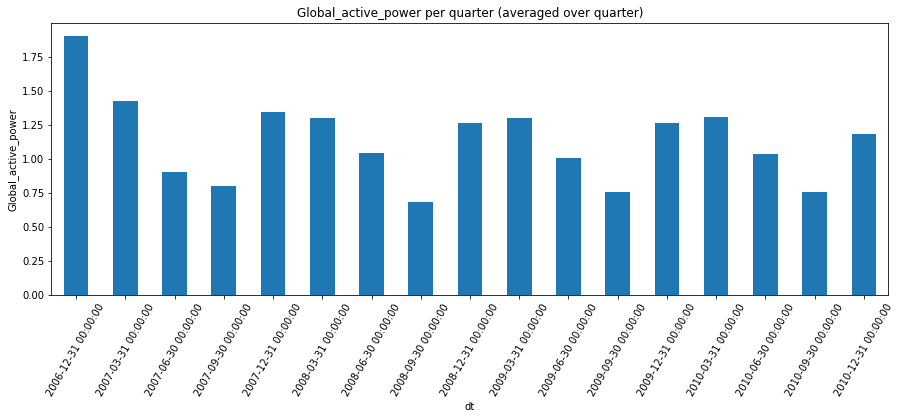

In [19]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar',figsize= (15,5))
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

Note - It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering. 

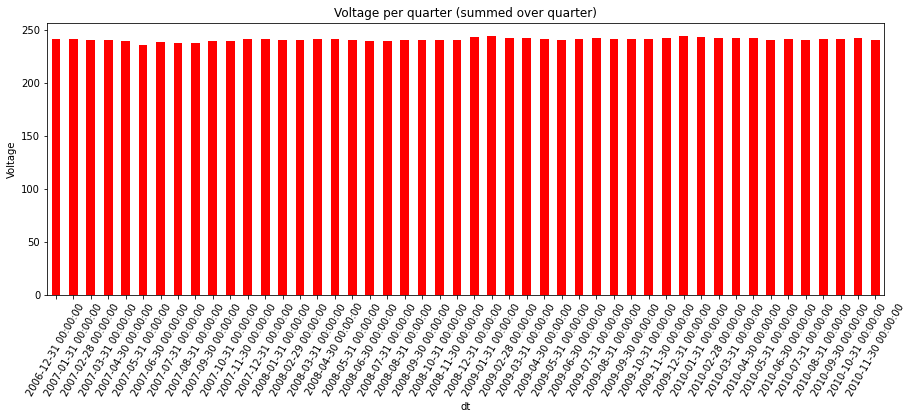

In [21]:
## mean of 'Voltage' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar', color='red',figsize= (15,5))
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

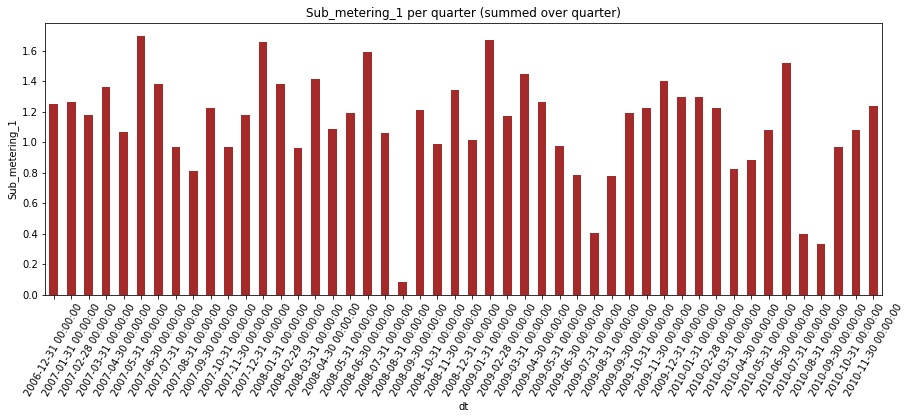

In [23]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown',figsize= (15,5))
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

Note- It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.

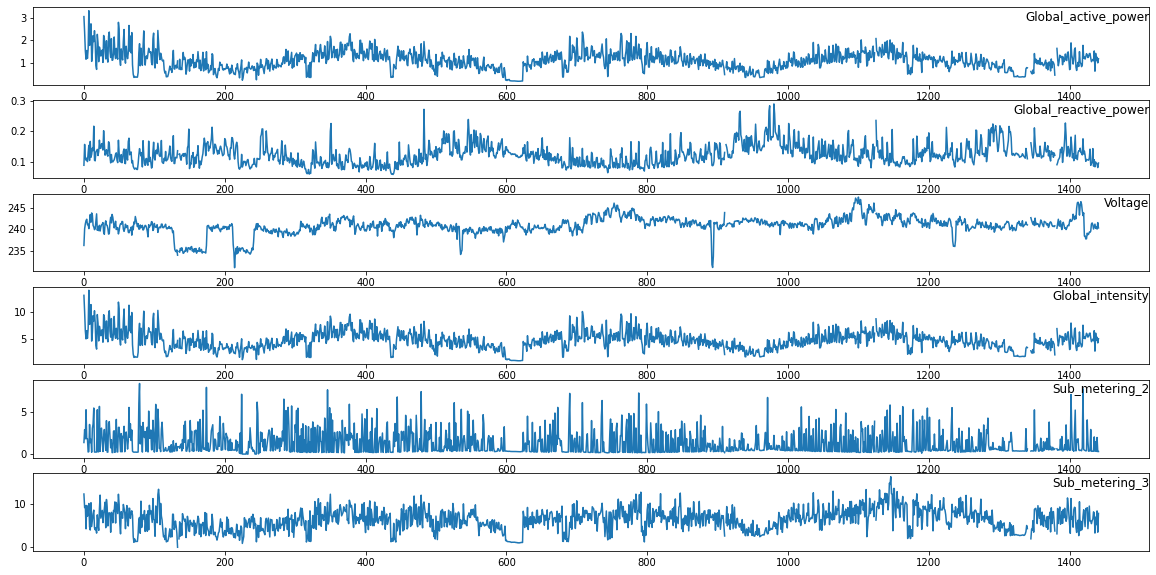

In [25]:
# compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(20, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

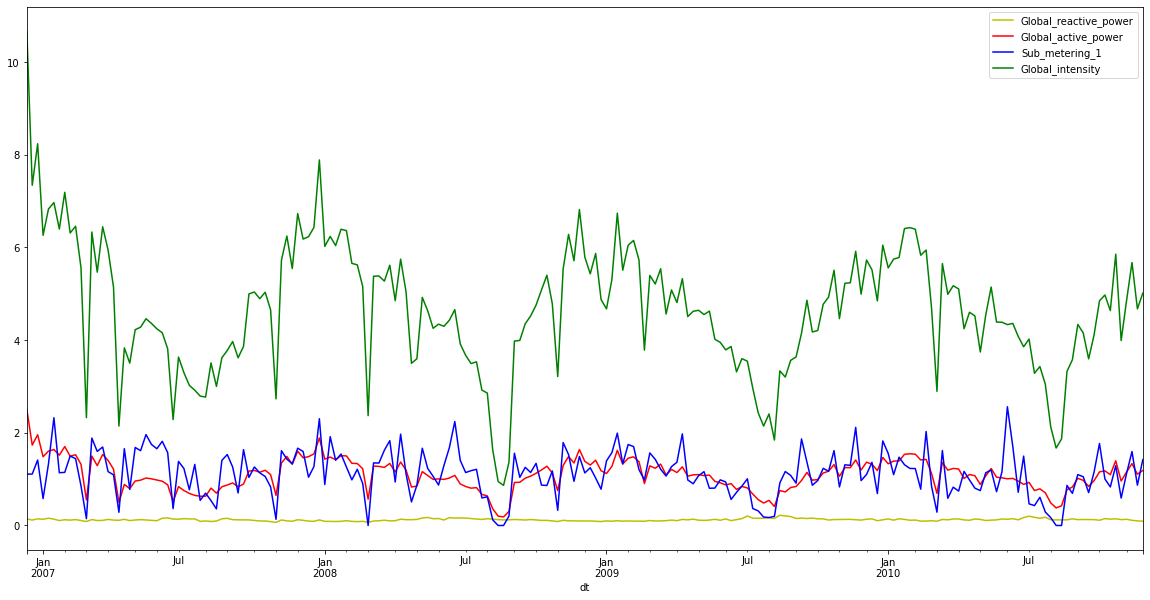

In [28]:
## resampling over week and computing mean
plt.figure(figsize=(20, 10))
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

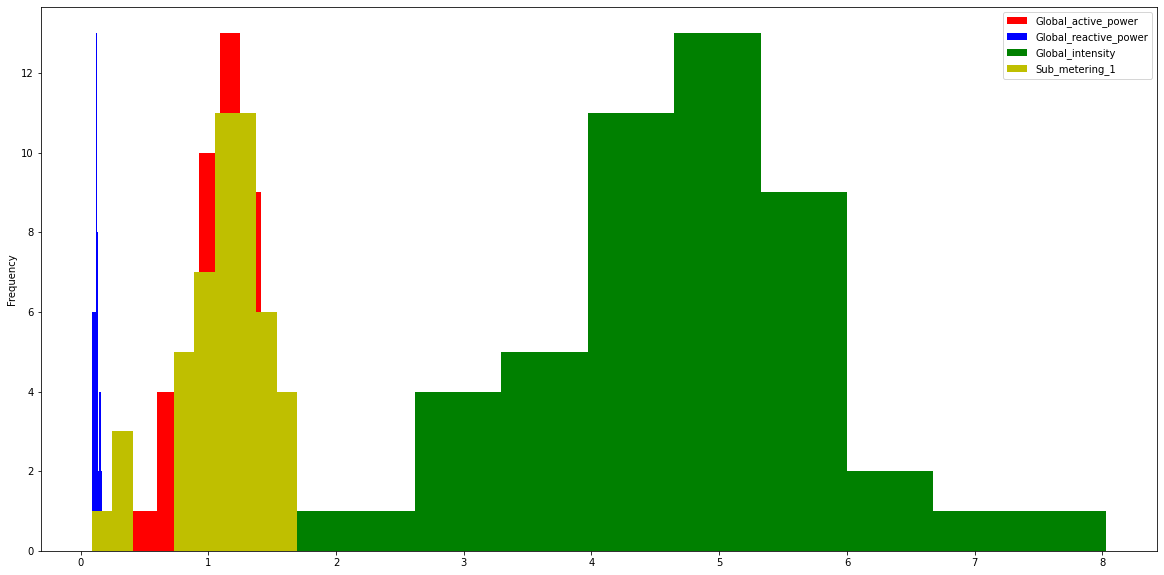

In [31]:
# hist plot of the mean of different feature resampled over month 
plt.figure(figsize=(20, 10))
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

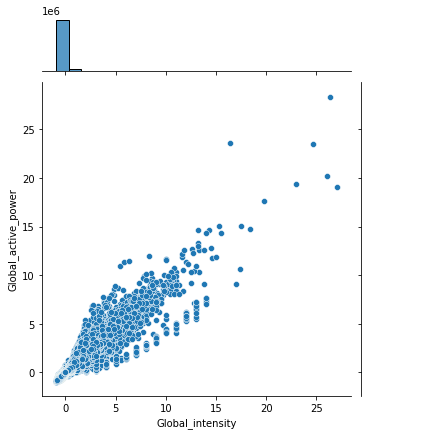

In [32]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  
plt.show()

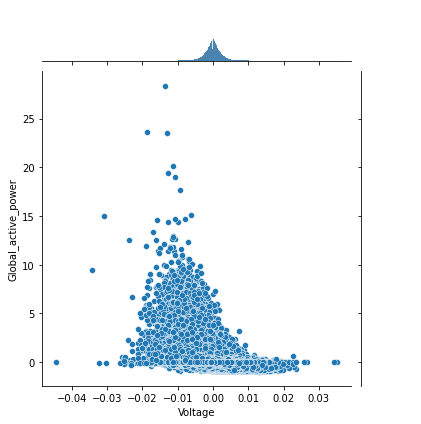

In [33]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose. 

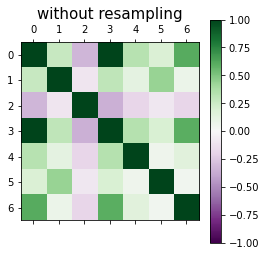

In [34]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

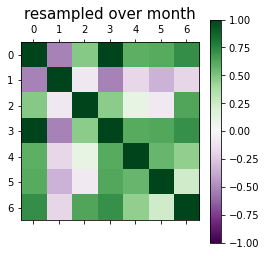

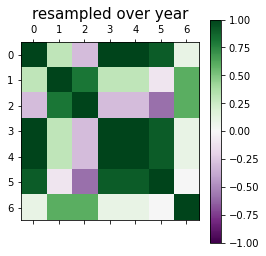

In [35]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

Note: It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature  engineering.

In [38]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.   

In [39]:
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [40]:
# scale all features in range of [0,1].
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917


In [41]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


Above showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current  time in hour (depending on resampling). 

## Splitting the rest of data to train and validation sets

First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [45]:
values = reframed.values
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
# split into input and outputs
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25399, 1, 7) (25399,)


### Model architecture

- LSTM with 100 neurons in the first visible layer 
- dropout 20%
- 1 neuron in the output layer for predicting Global_active_power. 
- The input shape will be 1 time step with 7 features.
- I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
- The model will be fit for 20 training epochs with a batch size of 70.


In [46]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
# fit network
history = model.fit(train_x, train_y, epochs=20, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Epoch 1/20
126/126 - 3s - loss: 0.0186 - val_loss: 0.0113 - 3s/epoch - 23ms/step
Epoch 2/20
126/126 - 0s - loss: 0.0121 - val_loss: 0.0105 - 460ms/epoch - 4ms/step
Epoch 3/20
126/126 - 1s - loss: 0.0116 - val_loss: 0.0101 - 529ms/epoch - 4ms/step
Epoch 4/20
126/126 - 1s - loss: 0.0113 - val_loss: 0.0098 - 586ms/epoch - 5ms/step
Epoch 5/20
126/126 - 0s - loss: 0.0112 - val_loss: 0.0098 - 466ms/epoch - 4ms/step
Epoch 6/20
126/126 - 0s - loss: 0.0112 - val_loss: 0.0097 - 475ms/epoch - 4ms/step
Epoch 7/20
126/126 - 1s - loss: 0.0111 - val_loss: 0.0097 - 572ms/epoch - 5ms/step
Epoch 8/20
126/126 - 0s - loss: 0.0111 - val_loss: 0.0096 - 457ms/epoch - 4ms/step
Epoch 9/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0098 - 444ms/epoch - 4ms/step
Epoch 10/20
126/126 - 0s - loss: 0.0109 - val_loss: 0.0097 - 470ms/epoch - 4ms/step
Epoch 11/20
126/126 - 0s - loss: 0.0110 - val_loss: 0.0097 - 495ms/epoch - 4ms/step
Epoch 12/20
126/126 - 0s - loss: 0.0109 - val_loss: 0.0098 - 454ms/epoch - 4ms/step
Epo

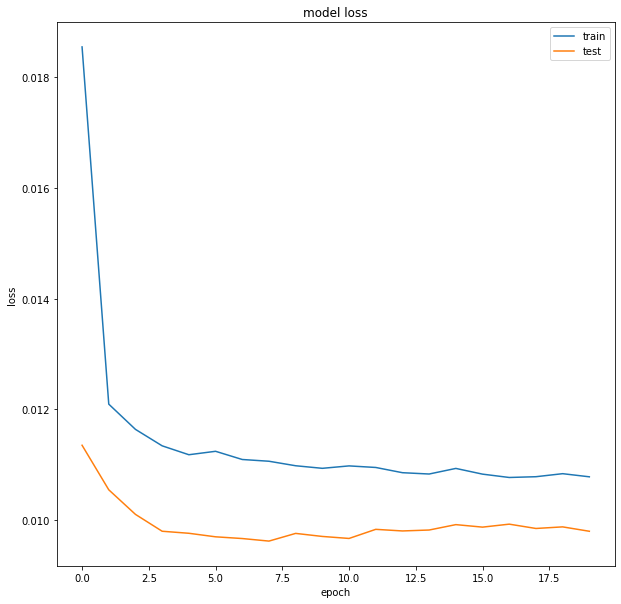

In [49]:
# summarize history for loss
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [50]:
# make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], 7))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

794/794 [==============================] - 1s 1ms/step
Test RMSE: 0.637


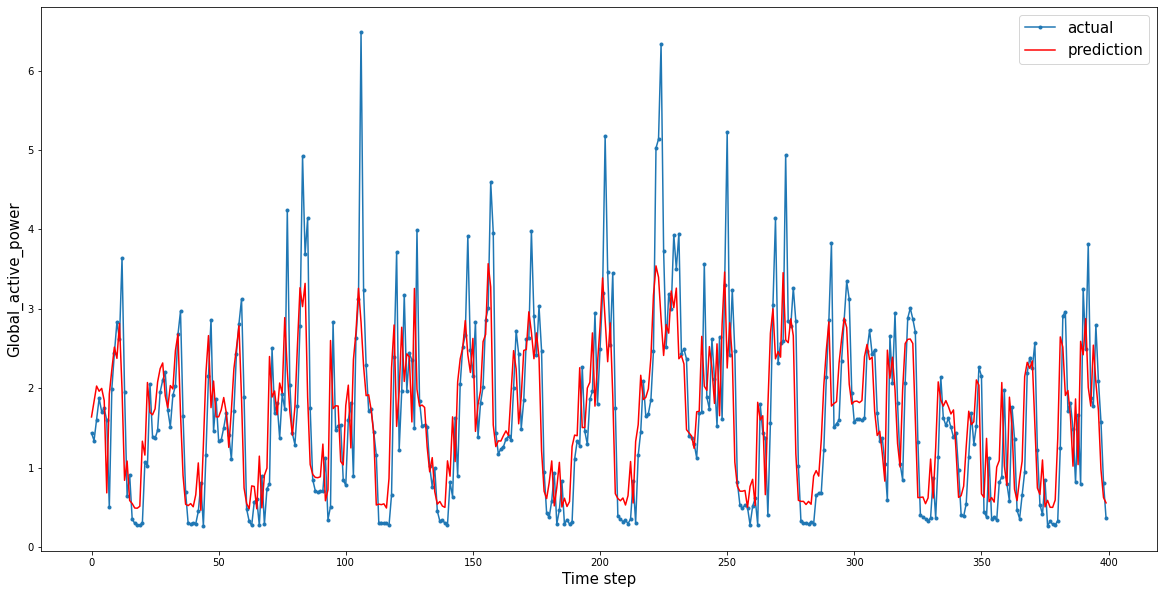

In [51]:
aa=[x for x in range(400)]
plt.figure(figsize=(20, 10))
plt.plot(aa, inv_y[:400], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()